Predictive Analysis of Survival Rate on Titanic
===============================================

This is a predictive machine learning project using ```R``` based on Kaggle competition: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). 

----------
**Content**

1. Introduction

      1.1 Objective

      1.2 Data Understanding

2. Data Preparation and Exploratory Analysis

      2.1 Data Cleaning

      2.2 Exploratory Analysis and Data Processing

3. Modeling

      3.1 Feature Engineering

      3.2 Model Training

      3.3 Model  Evaluation

4. Prediction

----------

## 1. Introduction

### 1.1 Objective

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we are going to complete the analysis of what sorts of people were likely to survive.

### 1.2 Data Understanding

To download data, click [here][1]


  [1]: https://www.kaggle.com/c/titanic/data

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

The training set is used to build machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

**Data Dictionary**

| Variable  |  Definition | Key  |   
|-----------|-------------|---------|
| survival  |  Survival   |  0 = No, 1 = Yes |  
|  pclass	 |  Ticket class |  1 = 1st, 2 = 2nd, 3 = 3rd |  
|  sex |  Sex |   |   
|  Age |   Age in years |   |  
|  sibsp |  # of siblings / spouses aboard the Titanic |   |   
| parch  | # of parents / children aboard the Titanic  |   |   
|  ticket | Ticket number  |   |  
|  fare | Passenger fare  |   |   
| cabin  |  Cabin number  |   |   
| embarked  | Port of Embarkation  |C = Cherbourg, Q = Queenstown, S = Southampton   |   

**Variable Notes**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

First, let's load the data and take a look at it.

In [1]:
library('dplyr') # data manipulation
library('ggplot2') # Data Visualization
library('ggthemes') # Data Visualization

options(warn = -1)
# load train.csv
train <- read.csv('../input/train.csv', stringsAsFactors = F)
# load test.csv
test  <- read.csv('../input/test.csv', stringsAsFactors = F)
# combine them as a whole
test$Survived <- NA
full <- rbind(train,test)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# show first several rows of the data
head(full)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [3]:

# check the data
str(full)

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


We've got a sense of our variables, their class type, and the first few observations of each. We know we're working with 1309 observations of 12 variables. In which 891 observations are from train data set, and 418 observations are from test data set. When separate the variables by type, we have ordinal variable **PassengerId**, lable variable **Name** and **Ticket**, numeric variables such as **Age**, **SibSp**, **Parch**, **Fare**, and categorical variables like **Survived** ,**Pclass**, **Sex** ,**Cabin**, and  **Embarked**. 

## 2. Data Preparation and Exploratory Analysis

### 2.1 Data Cleaning

From the data set, we notice that there are missing values in **Age**, **Cabin** ,**Fare** and **Embarked** column. We are going to replace missing values in Age with a random sample from existing ages. For Cabin, since cabin number makes little sense to the result, we are going to create a new Cabin column to indicate how many cabins the passenger has. 
 
**Age:**

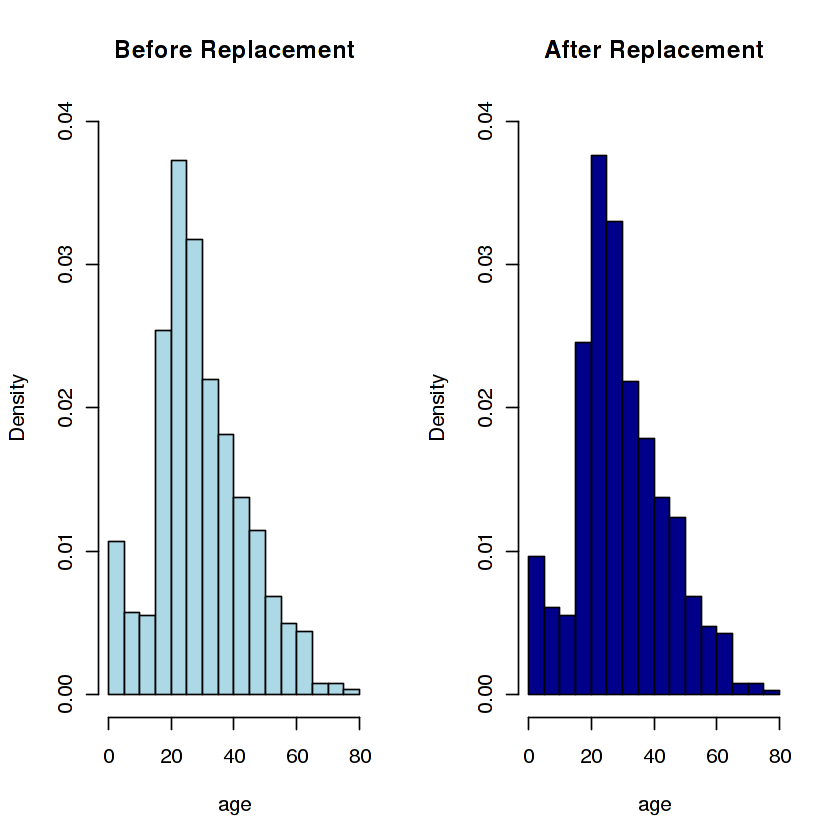

In [4]:
# Process Age Column

    # create a new data set age
age <- full$Age
n = length(age)
    # replace missing value with a random sample from raw data
set.seed(123)
for(i in 1:n){
  if(is.na(age[i])){
    age[i] = sample(na.omit(full$Age),1)
  }
}
    # check effect
par(mfrow=c(1,2))
hist(full$Age, freq=F, main='Before Replacement', 
  col='lightblue', ylim=c(0,0.04),xlab = "age")
hist(age, freq=F, main='After Replacement', 
  col='darkblue', ylim=c(0,0.04))

We can see from the histograms above that there is not much significant change of age distribution, which means the replacement is appropriate. Next we are going to process Cabin Column. We are going to create a new Cabin column to indicate how many cabins the passenger has.  

**Cabin:**

In [5]:
# Process Cabin Column to show number of cabins passenger has
cabin <- full$Cabin
n = length(cabin)
for(i in 1:n){
  if(nchar(cabin[i]) == 0){
    cabin[i] = 0
  } else{
    s = strsplit(cabin[i]," ")
    cabin[i] = length(s[[1]])
  }
} 
table(cabin)

cabin
   0    1    2    3    4 
1014  254   26   10    5 

**Fare:**

In [6]:
# process fare column

# check missing
full$PassengerId[is.na(full$Fare)]

[1] 1044

In [7]:
full[1044,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1044,1044,NA,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,,S


The passenger has feature value Pclass = 3 and Embarked =S. We then check the fare distribution of the same feature value.

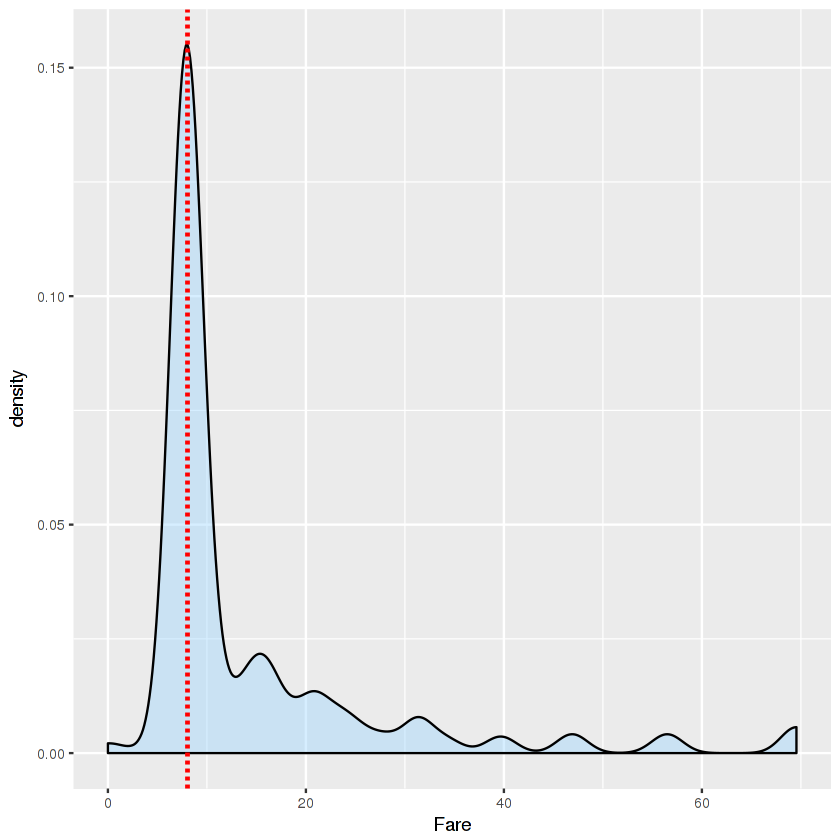

In [8]:
ggplot(full[full$Pclass == '3' & full$Embarked == 'S', ], 
  aes(x = Fare)) +
  geom_density(fill = '#99d6ff', alpha=0.4) + 
  geom_vline(aes(xintercept=median(Fare, na.rm=T)),
    colour='red', linetype='dashed', lwd=1)

In [9]:

# we can see that fare is clustered around mode. we just repace the missing value with 
# median fare of according Pclass and Embarked

full$Fare[1044] <- median(full[full$Pclass == '3' & full$Embarked == 'S', ]$Fare, na.rm = TRUE)


**Embarked**

In [10]:
# process embarked column
embarked <- full$Embarked
n = length(embarked)
for(i in 1:n){
  if(embarked[i] != "S" && embarked[i] != "C" && embarked[i] != "Q"){
    embarked[i] = "S"
  }
}
table(embarked)

embarked
  C   Q   S 
270 123 916 

### 2.1 Exploratory Analysis and Data Processing

As our objective is to figure out  what features would influence the survival, we are going to go deep into the data to explore the relationship between each attribute and survival.

**Age** v.s **Survival**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


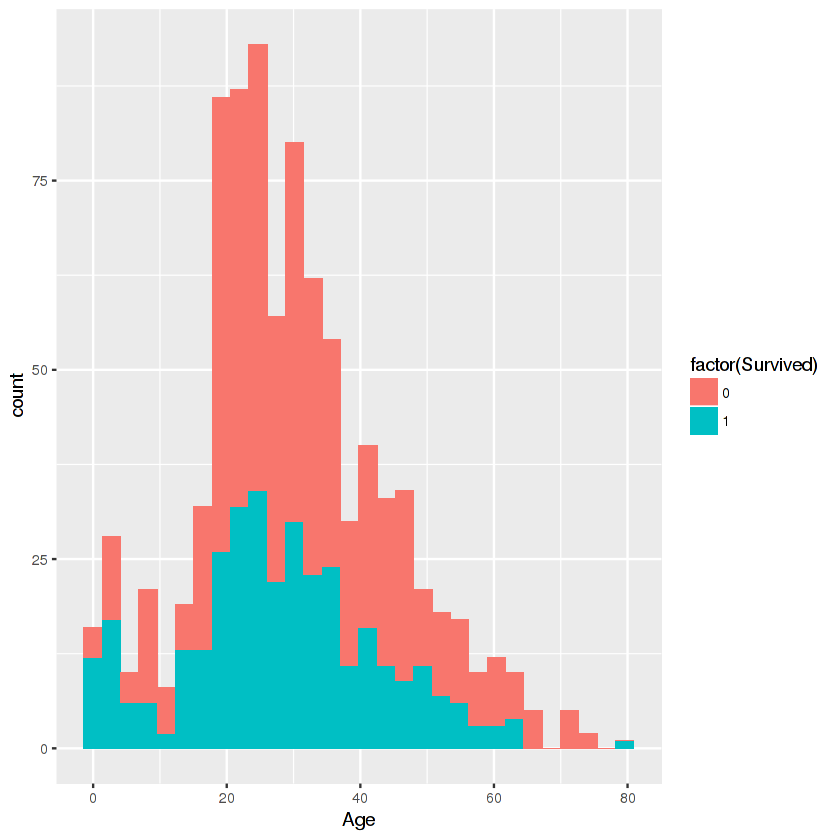

In [11]:
# number of survivals and nonsurvivals across different age
d <- data.frame(Age = age[1:891], Survived = train$Survived)
ggplot(d, aes(Age,fill = factor(Survived))) +
    geom_histogram()

From the histogram, it seems that kids with very young age have a respectively higher survival rate, and elder people have a respectively lower survival rate. To verify it, I create a bar chart to show the relationship between survival rate and age intervals.

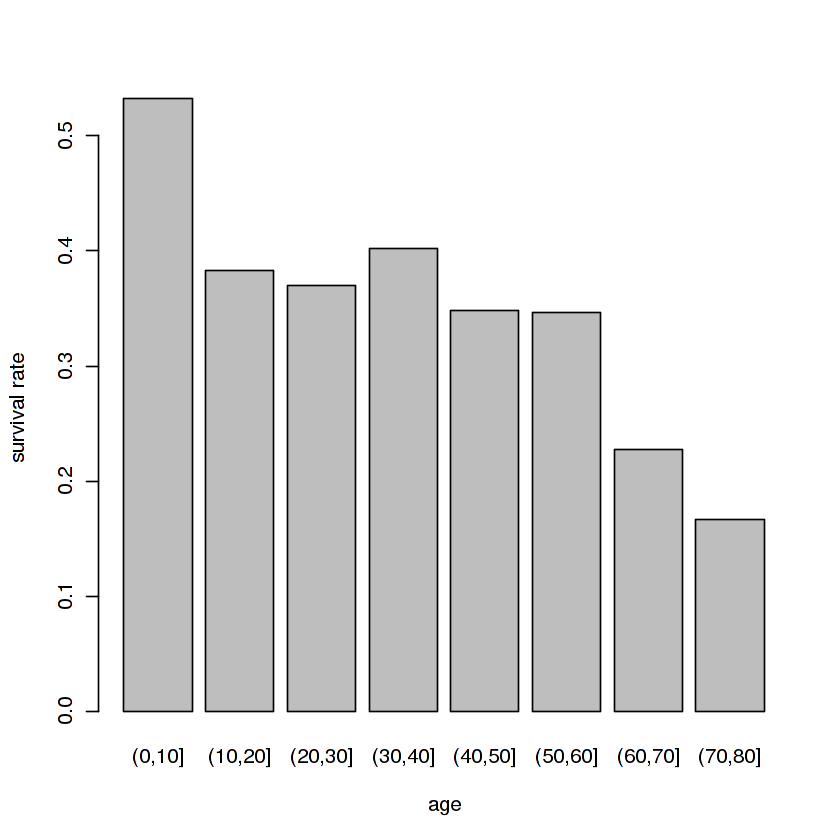

In [12]:
# create bar chart to show relationship between survival rate and age intervals
cuts <- cut(d$Age,hist(d$Age,10,plot = F)$breaks)
rate <- tapply(d$Survived,cuts,mean)
d2 <- data.frame(age = names(rate),rate)
barplot(d2$rate, xlab = "age",ylab = "survival rate")

We can see clearly from the bar chart above that **survival rate decreases as age increases**. Kids below 10 years old have a higher survival rate above 0.5, people who's age is between 10 to 60 have a relatively constant survival rate around 0.4, and elder people above 60 years old has a lower survival rate around 0.2.


----------


**Sex** v.s **Survival**

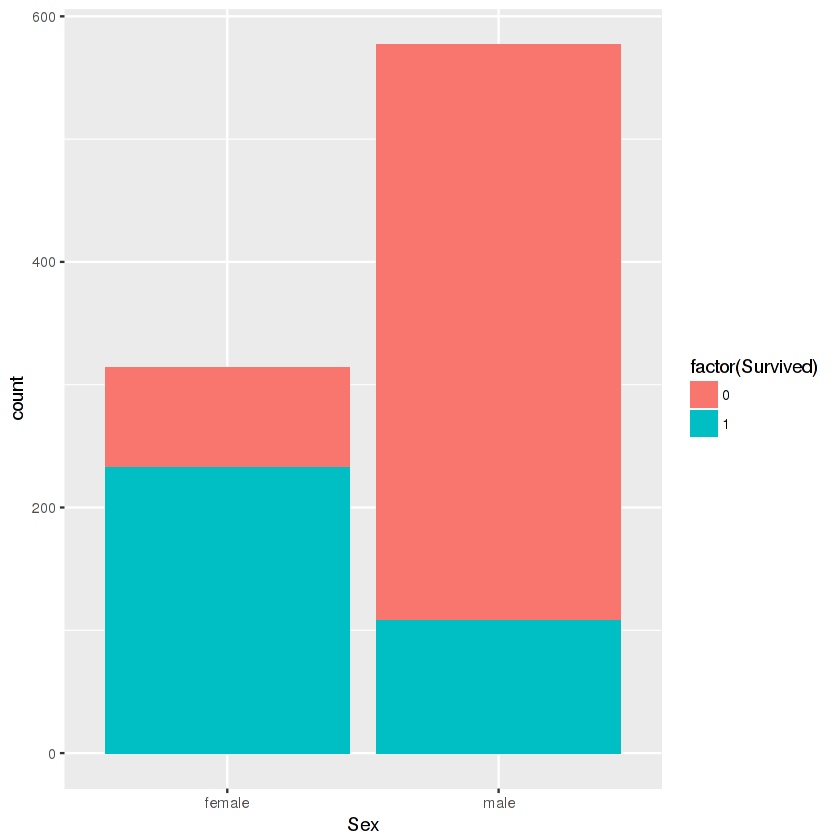

In [13]:
# create histgram to show effect of Sex on survival
ggplot(train, aes(Sex,fill = factor(Survived))) +
    geom_histogram(stat = "count")

We can see from the histogram above that **female's survival rate is greater than male's**.

In [14]:
# calculate survival rate
tapply(train$Survived,train$Sex,mean)

female      male 
0.7420382 0.1889081

The survival rate of female is 0.74, while the survival rate of male is 0.19.


----------

**Name** v.s. **Survival**

We also notice that title of surname is a meaningful feature. 

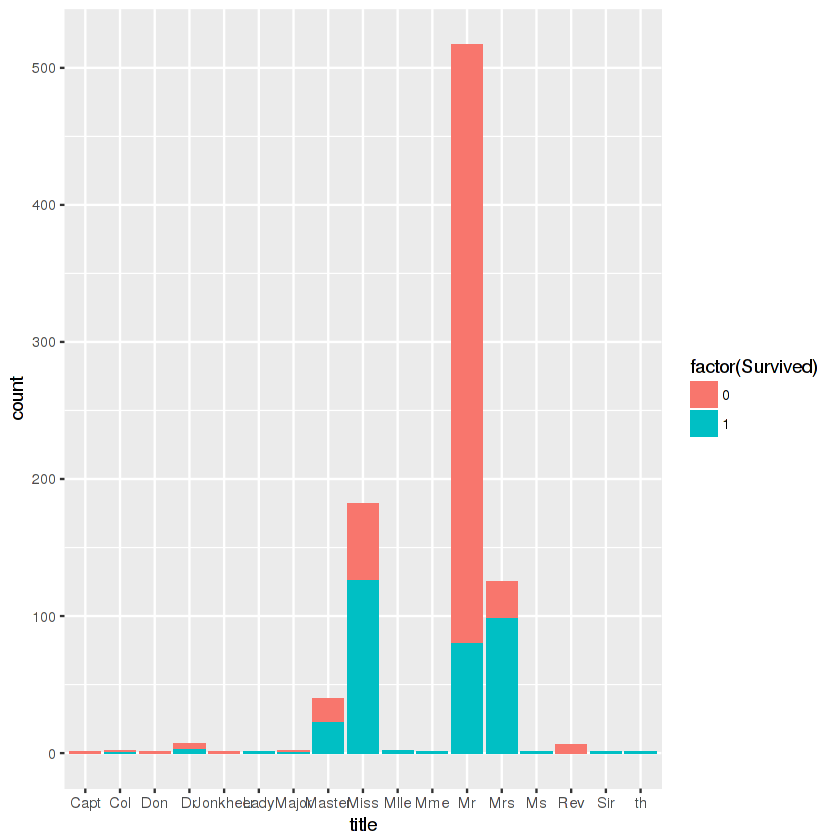

In [15]:
# extract title from Name 
# (here I process full data set but only plot title vs survival in train 
#    data set because there is no survival value for test data set)
n = length(full$Survived)
title = rep(NA,n)
for (i in 1:n){
  lastname = strsplit(full$Name[i],", ")[[1]][2]
  title[i] = strsplit(lastname,". ")[[1]][1]
}

# make a histogram of title v.s survival
d <- data.frame(title = title[1:891],Survived = train$Survived)
ggplot(d, aes(title,fill = factor(Survived))) +
    geom_histogram(stat = "count")

To see clearly the survival rate for each group, we also make a table.

In [16]:
# count of title
table(title)

title
    Capt      Col      Don     Dona       Dr Jonkheer     Lady    Major 
       1        4        1        1        8        1        1        2 
  Master     Miss     Mlle      Mme       Mr      Mrs       Ms      Rev 
      61      260        2        1      757      197        2        8 
     Sir       th 
       1        1 

In [17]:
# survival rate
tapply(d$Survived,d$title,mean)

Capt       Col       Don        Dr  Jonkheer      Lady     Major    Master 
0.0000000 0.5000000 0.0000000 0.4285714 0.0000000 1.0000000 0.5000000 0.5750000 
     Miss      Mlle       Mme        Mr       Mrs        Ms       Rev       Sir 
0.6978022 1.0000000 1.0000000 0.1566731 0.7920000 1.0000000 0.0000000 1.0000000 
       th 
1.0000000

We can see from the table, survival rates of females with Miss and Mrs title are close to the average survival rate for female group calculated in last section. Survival rates of males with Master are higher than the average male group. Titles like Col, Rev, Dr etc. also have influence on the survival.  

Since number of  each rare title is much smaller than the majorities, we replace these rare titles to 'Rare'.

In [18]:
# replace rare titles to 'Rare'
title[title != 'Mr' & title != 'Miss' & title != 'Mrs' & title != 'Master'] <- 'Rare'
table(title)

title
Master   Miss     Mr    Mrs   Rare 
    61    260    757    197     34 


----------


**Pclass** v.s. **Survival**

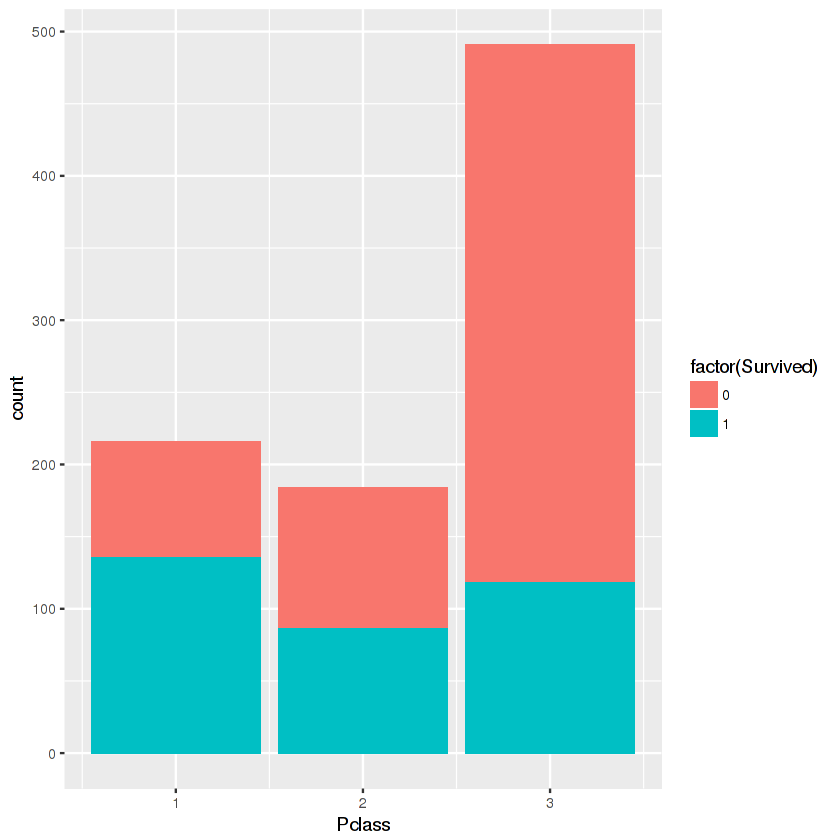

In [19]:
# make a histogram
ggplot(train, aes(Pclass,fill = factor(Survived))) +
    geom_histogram(stat = "count")

In [20]:
# calculate survival rate
tapply(train$Survived,train$Pclass,mean)

1         2         3 
0.6296296 0.4728261 0.2423625

From the histogram and table, we notice that **Pclass = 1 group has the highest survival rate, then is Pclass = 2 group, and Pclass = 3  group has the lowest survival rate within these three groups**.


----------

**Family Size** v.s. **Survival**

We first check SibSp and Parch column separately.

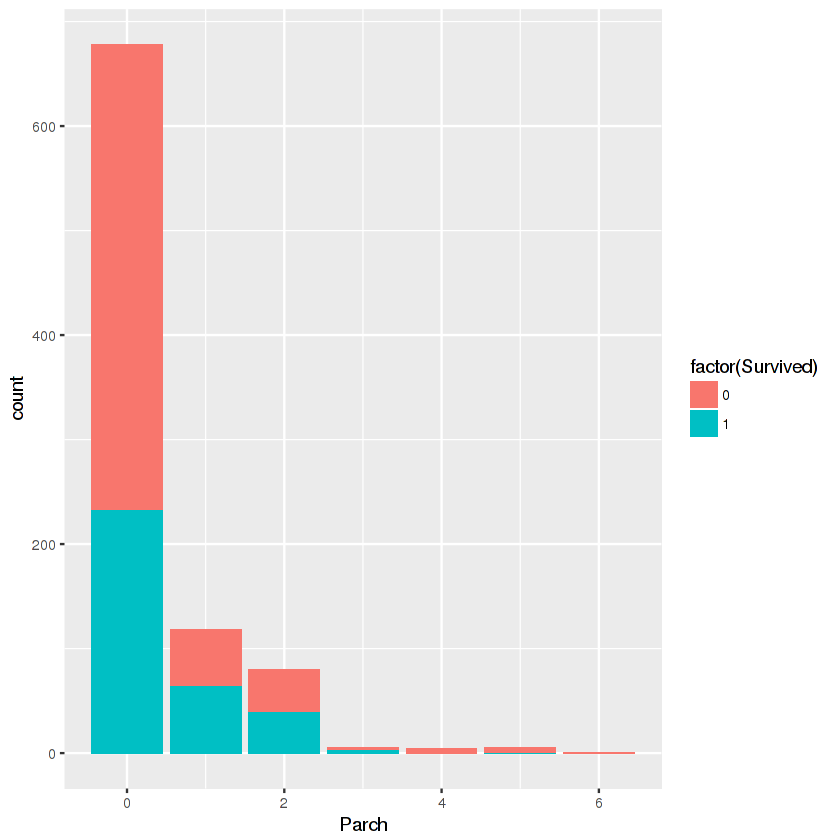

In [21]:
# histogram of Parch
ggplot(train, aes(Parch,fill = factor(Survived))) +
    geom_histogram(stat = "count")

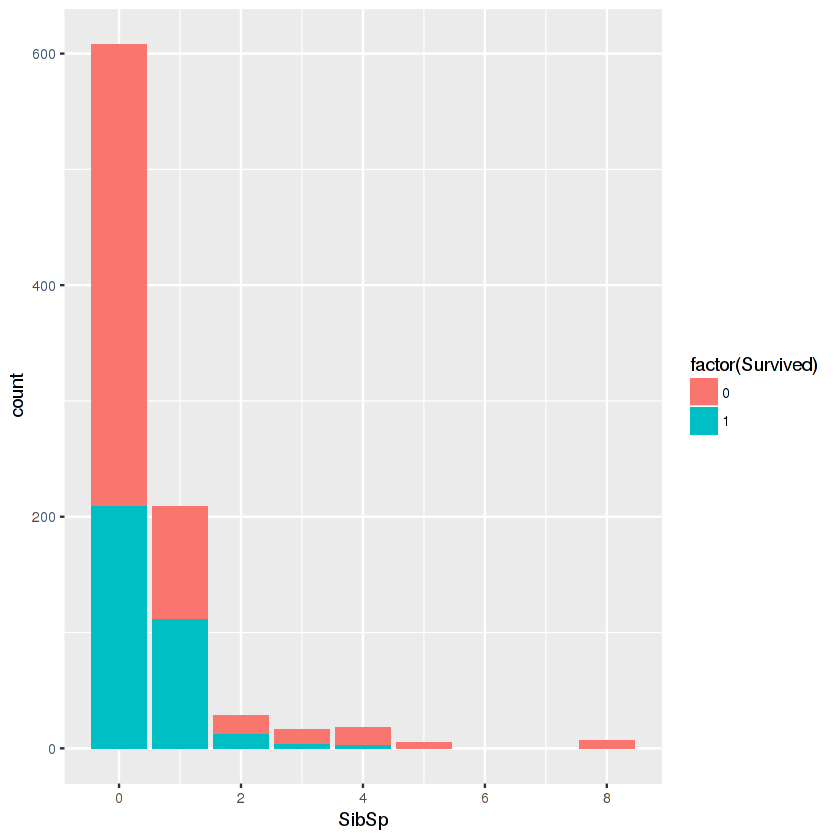

In [22]:
# histogram of SibSp
ggplot(train, aes(SibSp,fill = factor(Survived))) +
    geom_histogram(stat = "count")

We can see that they have similar trend, then we decide to combine them together to construct a column named family.

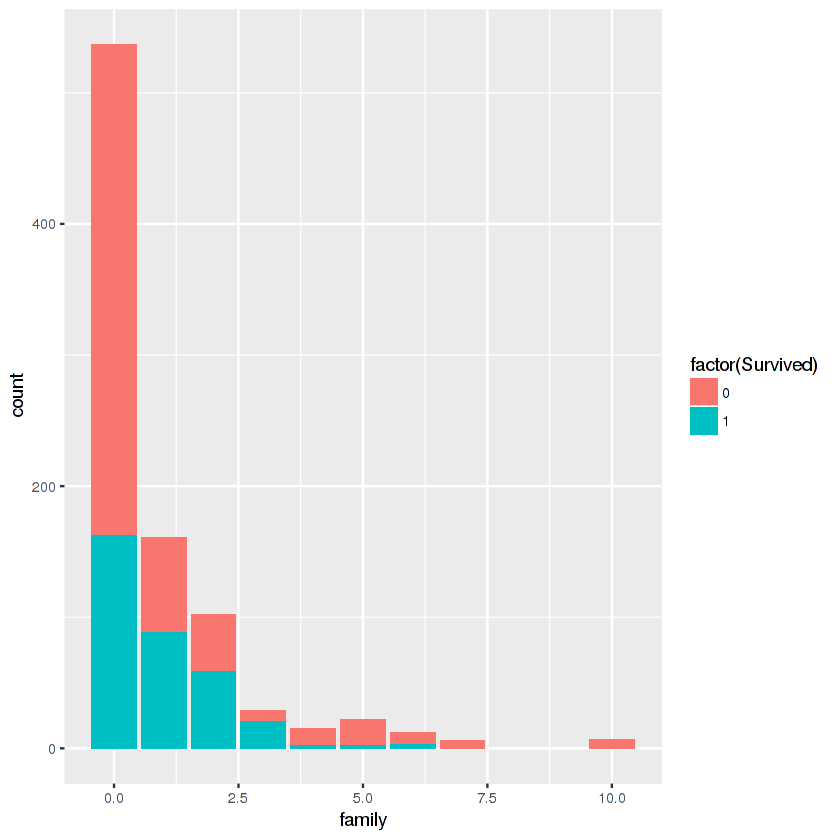

In [23]:
# combine SibSp and Parch 
family <- full$SibSp + full$Parch
d <- data.frame(family = family[1:891],Survived = train$Survived)
ggplot(d, aes(family,fill = factor(Survived))) +
    geom_histogram(stat = "count")

In [24]:
tapply(d$Survived,d$family,mean)

0         1         2         3         4         5         6         7 
0.3035382 0.5527950 0.5784314 0.7241379 0.2000000 0.1363636 0.3333333 0.0000000 
       10 
0.0000000

We can see that **the survival rate increases as the family size increases from 0 to 3. When family size becomes greater than 3, survival rate decrease dramatically.** 


----------

**Cabin** v.s. **Survival**

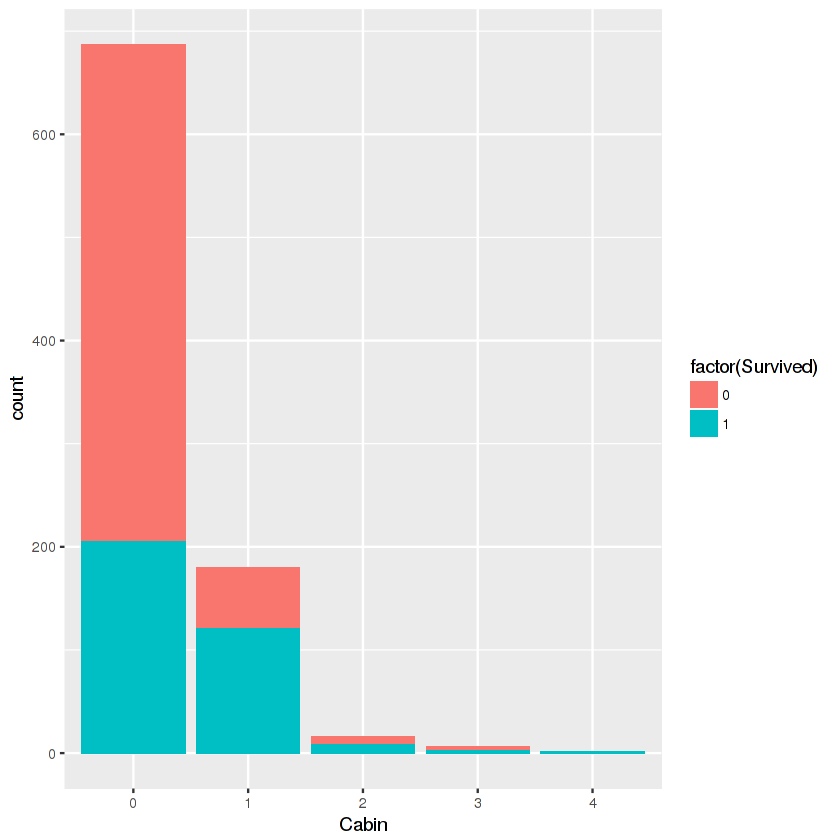

In [25]:
# create histogram
d <- data.frame(Cabin = cabin[1:891],Survived = train$Survived)
ggplot(d, aes(Cabin,fill = factor(Survived))) +
    geom_histogram(stat = "count")

In [26]:
# calculate survival rate
tapply(d$Survived,d$Cabin,mean)

0         1         2         3         4 
0.2998544 0.6777778 0.5625000 0.5000000 1.0000000

We notice that **passenger who has no cabin has a lower survival rate, and passenger who has one or more cabins has higher survival rate.**


----------

**Fare** v.s. **Survival**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


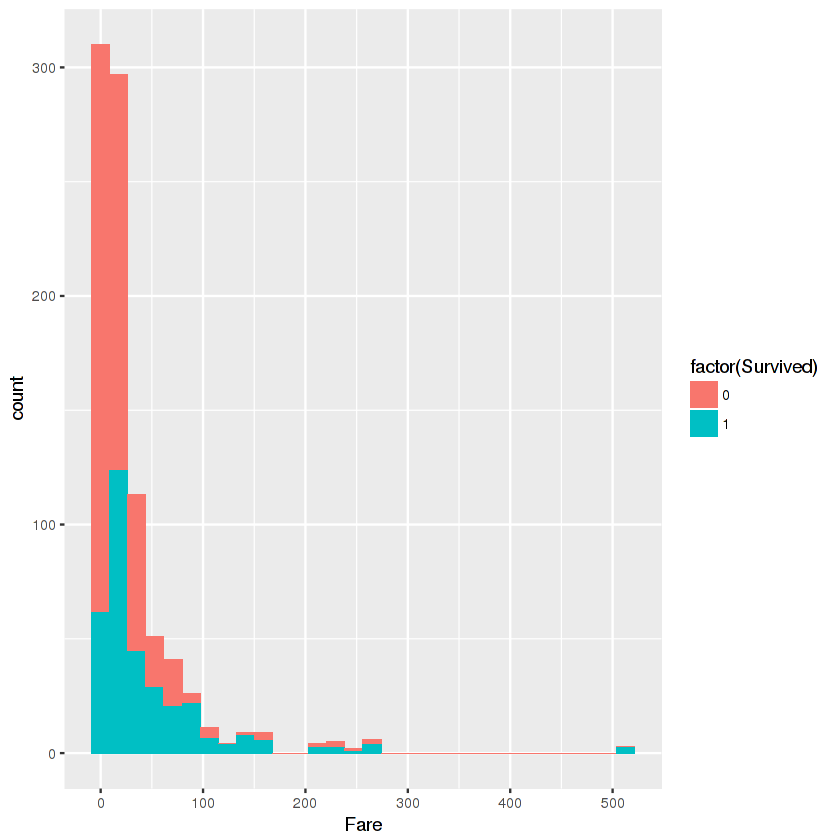

In [27]:
# make a histogram
ggplot(train, aes(Fare,fill = factor(Survived))) +
    geom_histogram()

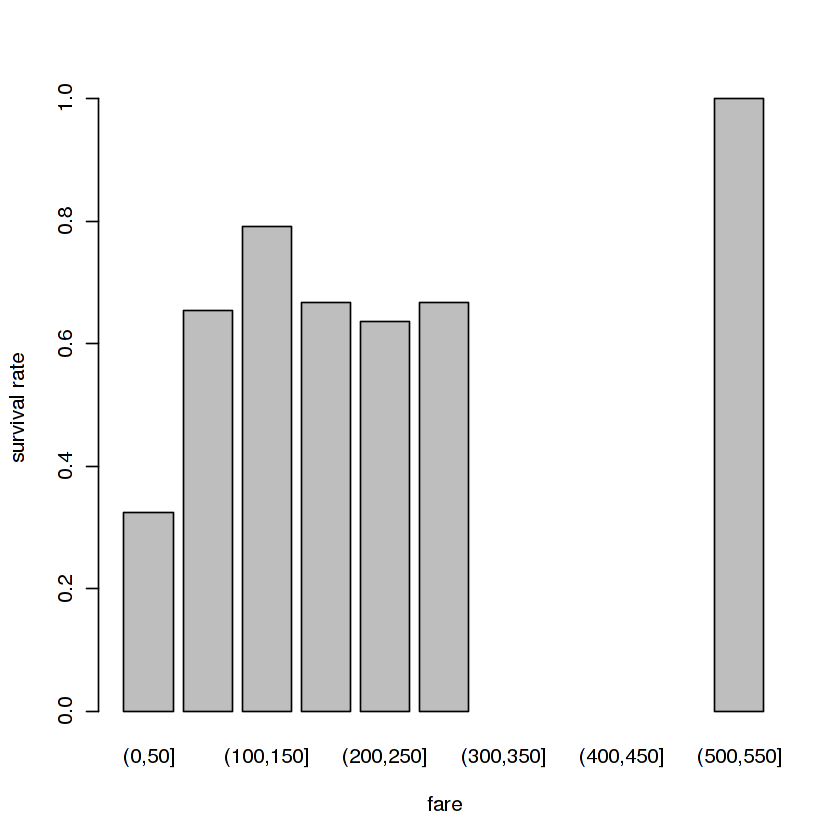

In [28]:
# calculate
cuts <- cut(train$Fare,hist(train$Fare,10,plot = F)$breaks)
rate <- tapply(train$Survived,cuts,mean)
d <- data.frame(fare = names(rate),rate)
barplot(d$rate, xlab = "fare",ylab = "survival rate")

We notice that **Passengers who's fare is lower than 50 has a relatively lower survival rate. Passengers who's fare is extremely high (500-550) have very high survival rate.**


----------

**Embarked** v.s. **Survival**

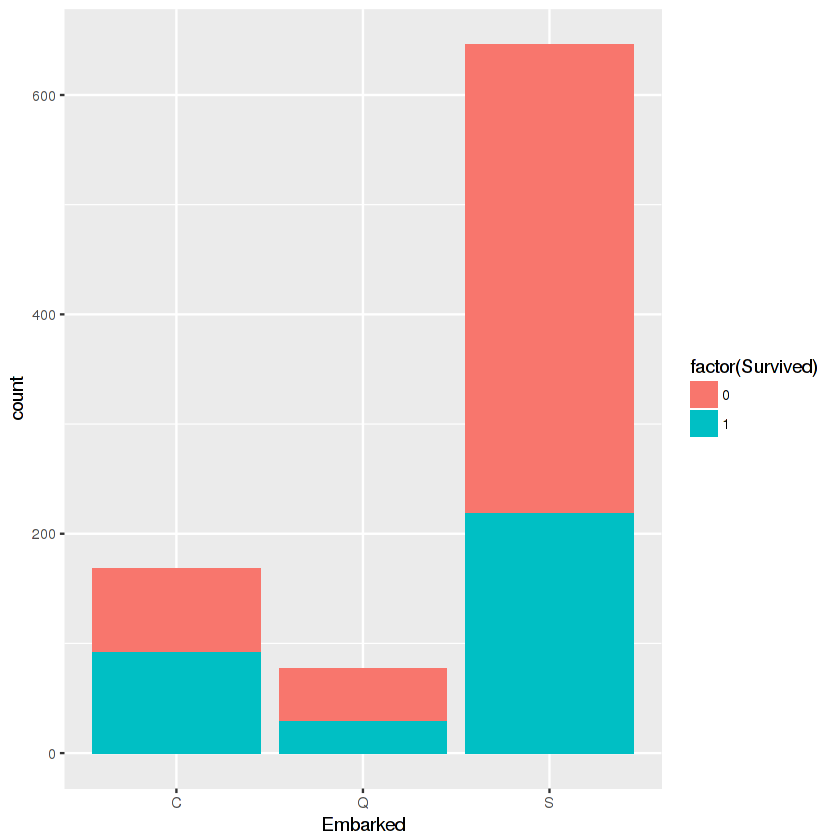

In [29]:
# make histogram
d <- data.frame(Embarked = embarked[1:891], Survived = train$Survived)
ggplot(d, aes(Embarked,fill = factor(Survived))) +
    geom_histogram(stat = "count")

In [30]:
# make table
tapply(train$Survived,train$Embarked,mean)

C         Q         S 
1.0000000 0.5535714 0.3896104 0.3369565

We notice that Embarked C group has a relatively higher survival rate than other 2 groups.

## 3. Modeling

### 3.1 Feature Engineering

In this section, we are going to prepare features used for training and predicting. We first choose our features that have significant effect on survival according to the exploratory process above. Here we choose Survived column as response variable, age (after filling), title, Pclass, Sex, family size, Fare, cabin(cabin count), Embarked these 8 column as features. 

| Response Variable (Y)  |  Features (X)  |   
|-----------|-------------|---------|-----------|-------------|---------|-----------|-------------|---------|
| Survived  |  age ,fare, cabin , title  , family , Pclass,   Sex ,  Embarked  | 

In [31]:
# response variable
f.survived = train$Survived

In [32]:
# feature
# 1. age
f.age = age[1:891]    # for training
t.age = age[892:1309]  # for testing

In [33]:
# 2. fare
f.fare = full$Fare[1:891]
t.fare = full$Fare[892:1309]

In [34]:
# 3. cabin
f.cabin = cabin[1:891]
t.cabin = cabin[892:1309]

# 4. title
f.title = title[1:891]
t.title = title[892:1309]

# 5. family
family <- full$SibSp + full$Parch
f.family = family[1:891]
t.family = family[892:1309]

# 6. plcass
f.pclass = train$Pclass
t.pclass = test$Pclass

# 7. sex
f.sex = train$Sex
t.sex = test$Sex

# 8. embarked
f.embarked = embarked[1:891]
t.embarked = embarked[892:1309]

### 3.2 Model Training

We tried to build basic learners using common machine learning model such as Logistic Regression, Decision Tree, Random Forest, SVM. 

In [35]:
# construct training data frame
new_train = data.frame(survived = f.survived, age = f.age, fare = f.fare , sex = f.sex, 
       embarked = f.embarked ,family = f.family ,title = f.title ,cabin =  f.cabin, pclass= f.pclass)

In [36]:
# logistic regression
fit_logit <- glm(factor(survived) ~ age + fare + sex + embarked + family 
                 + title + cabin + pclass,data = new_train,family = binomial)
    # predicted result of regression
ans_logit = rep(NA,891)
for(i in 1:891){
  ans_logit[i] = round(fit_logit$fitted.values[[i]],0)
}
    # check result
mean(ans_logit == train$Survived)
table(ans_logit)

[1] 0.8372615

ans_logit
  0   1 
566 325 

In [37]:
# random forest
library('randomForest')

set.seed(123)
fit_rf <- randomForest(factor(survived) ~ age + fare + sex + embarked + family 
                 + title + cabin + pclass,data = new_train)

    # predicted result of regression
rf.fitted = predict(fit_rf)
ans_rf = rep(NA,891)
for(i in 1:891){
  ans_rf[i] = as.integer(rf.fitted[[i]]) - 1
}
    # check result
mean(ans_rf == train$Survived)
table(ans_rf)


randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



[1] 0.8260382

ans_rf
  0   1 
590 301 

In [38]:
# decision tree
library(rpart)

fit_dt <- rpart(factor(survived) ~ age + fare + sex + embarked + family 
                 + title + cabin + pclass,data = new_train)

    # predicted result of regression
dt.fitted = predict(fit_dt)
ans_dt = rep(NA,891)
for(i in 1:891){
  if(dt.fitted[i,1] >= dt.fitted[i,2] ){
    ans_dt[i] = 0
  } else{
    ans_dt[i] = 1
  }
}
    # check result
mean(ans_dt == train$Survived)
table(ans_dt)


[1] 0.8170595

ans_dt
  0   1 
568 323 

In [39]:
# svm
library(e1071)

fit_svm <- svm(factor(survived) ~ age + fare + sex + embarked + family 
                 + title + cabin + pclass,data = new_train)

    # predicted result of regression
svm.fitted = predict(fit_svm)
ans_svm = rep(NA,891)
for(i in 1:891){
  ans_svm[i] = as.integer(svm.fitted[[i]]) - 1
}
    # check result
mean(ans_svm == train$Survived)
table(ans_svm)


[1] 0.8361392

ans_svm
  0   1 
583 308 

### 3.3 Model  Evaluation

We built 4 basic learner in last section. Then we are going to evaluate model accuracy using ```Confusion Matrix```.

![enter image description here][1]


  [1]: http://i64.tinypic.com/24lvbrk.png

**Logistic Regression:**

In [40]:
# logistic
a = sum(ans_logit ==1 & f.survived == 1)
b = sum(ans_logit ==1 & f.survived == 0)
c = sum(ans_logit ==0 & f.survived == 1)
d = sum(ans_logit ==0 & f.survived == 0)
data.frame(a,b,c,d)

a,b,c,d
261,64,81,485



![enter image description here][1]


  [1]: http://i66.tinypic.com/b8tm69.png

**Random Forest:**

In [41]:
# Random Forest
a = sum(ans_rf ==1 & f.survived == 1)
b = sum(ans_rf ==1 & f.survived == 0)
c = sum(ans_rf ==0 & f.survived == 1)
d = sum(ans_rf ==0 & f.survived == 0)
data.frame(a,b,c,d)

a,b,c,d
244,57,98,492


![enter image description here][1]


  [1]: http://i67.tinypic.com/2saxr8k.png

**Decision Tree:**


In [42]:
# Decision Tree
a = sum(ans_dt ==1 & f.survived == 1)
b = sum(ans_dt ==1 & f.survived == 0)
c = sum(ans_dt ==0 & f.survived == 1)
d = sum(ans_dt ==0 & f.survived == 0)
data.frame(a,b,c,d)

a,b,c,d
251,72,91,477


![enter image description here][1]


  [1]: http://i68.tinypic.com/qravl3.png

**SVM:**

In [43]:
# SVM
a = sum(ans_svm ==1 & f.survived == 1)
b = sum(ans_svm ==1 & f.survived == 0)
c = sum(ans_svm ==0 & f.survived == 1)
d = sum(ans_svm ==0 & f.survived == 0)
data.frame(a,b,c,d)

a,b,c,d
252,56,90,493


![enter image description here][1]


  [1]: http://i64.tinypic.com/2lsxx8o.png

From matrix above, we can see that all models predict non-survival better than survival. And both logistic regression and SVM work well for training data set. Here, logistic regression has accuracy = 0.837, SVM has accuracy = 0.836.




## 4. Prediction

Since we got models that have reasonable predictive power, we can perform them to our test data set to make prediction. Here we choose SVM to perform prediction as an example.

In [44]:
# construct testing data frame
test_data_set <- data.frame(age = t.age, fare = t.fare, sex = t.sex, embarked = t.embarked, 
                            family = t.family, title = t.title,cabin =  t.cabin, pclass = t.pclass)
# make prediction
svm_predict = predict(fit_svm,newdata = test_data_set )
ans_svm_predict = rep(NA,418)
for(i in 1:418){
  ans_svm_predict[i] = as.integer(svm_predict[[i]]) - 1
}
table(ans_svm_predict)


ans_svm_predict
  0   1 
259 159 

In [45]:
# create a csv file for submittion
d<-data.frame(PassengerId = test$PassengerId, Survived = ans_svm_predict)
write.csv(d,file = "TitanicResult.csv",row.names = F)